<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_243962745_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.003)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 243962745
period = 24.077684389698  # Orbital period in days
epoch = 2771.99708110825
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.9]
folded_lc = folded_lc[folded_lc.time > -0.9]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_243962745_all_sector_lightcurve.csv


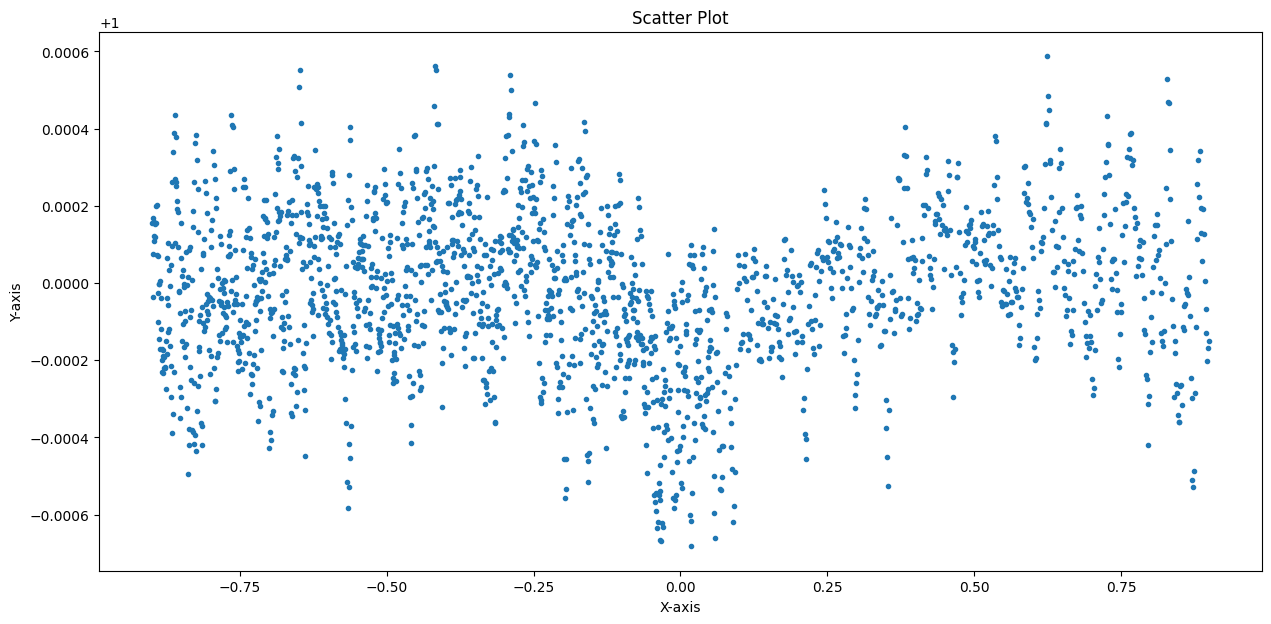

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([54])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

Sector 54


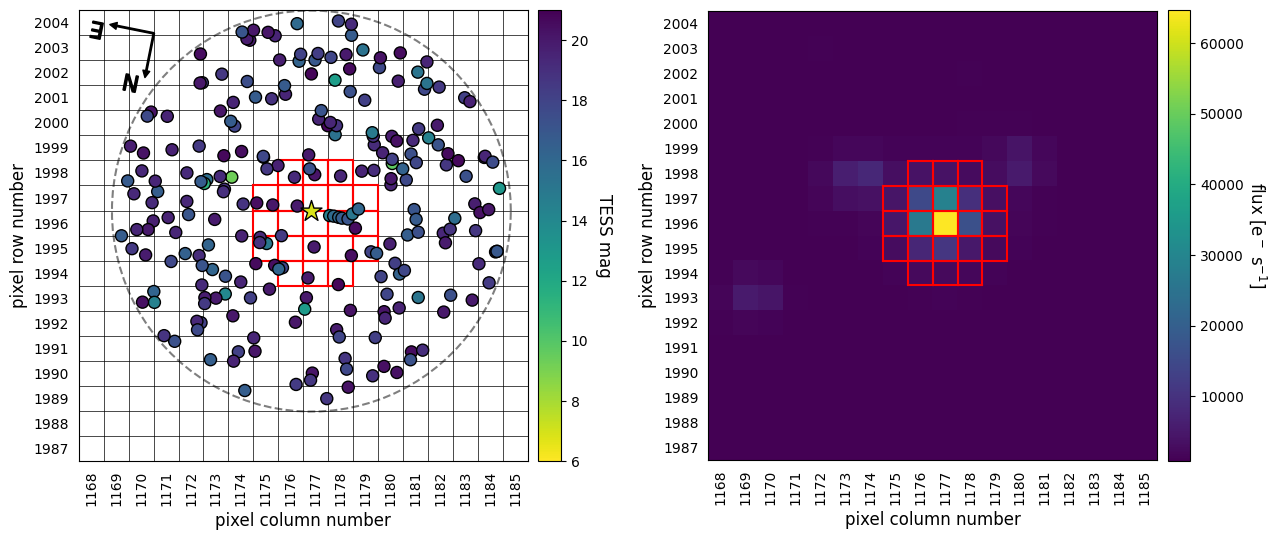

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,243962745,6.9161,6.115,5.685,5.537,303.499356,-0.866881,0.820000,0.769308,4955.0,50.898200,0.000,0.000
1,1983477697,19.9374,NaN,NaN,NaN,303.502808,-0.867374,NaN,NaN,NaN,NaN,12.552,98.121
2,388006609,14.5030,14.003,13.618,14.886,303.494990,-0.866699,NaN,NaN,NaN,NaN,15.731,272.387
3,388006611,15.8520,14.368,15.152,14.047,303.494042,-0.866760,NaN,NaN,NaN,NaN,19.134,271.305
4,388006610,16.0150,14.707,15.315,14.460,303.492851,-0.866716,NaN,NaN,NaN,NaN,23.424,271.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1983477458,17.9799,NaN,NaN,NaN,303.502157,-0.911537,1.000000,0.699313,5639.0,0.051848,161.078,176.411
229,1983477602,19.6445,NaN,NaN,NaN,303.468438,-0.899231,NaN,NaN,NaN,4.565340,161.085,223.700
230,243962693,17.0180,15.792,14.947,14.797,303.523552,-0.904537,0.662911,0.699186,3859.0,0.896856,161.127,147.281
231,1983477919,18.7668,NaN,NaN,NaN,303.526994,-0.831605,NaN,NaN,5295.0,0.199005,161.321,38.075


In [7]:
ap_54 = np.array([[1175.0, 1995.0], [1175.0, 1996.0], [1175.0, 1997.0], [1176.0, 1994.0],
      [1176.0, 1995.0], [1176.0, 1996.0], [1176.0, 1997.0], [1176.0, 1998.0], [1177.0,
        1994.0], [1177.0, 1995.0], [1177.0, 1996.0], [1177.0, 1997.0], [1177.0, 1998.0],
      [1178.0, 1994.0], [1178.0, 1995.0], [1178.0, 1996.0], [1178.0, 1997.0], [1178.0,
        1998.0], [1179.0, 1995.0], [1179.0, 1996.0], [1179.0, 1997.0]])

apertures = np.array([ap_54])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.228 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,243962745,6.9161,6.115,5.685,5.537,303.499356,-0.866881,0.820000,0.769308,4955.0,50.898200,0.000,0.000,9.889880e-01,0.000231
1,1983477697,19.9374,NaN,NaN,NaN,303.502808,-0.867374,NaN,NaN,NaN,NaN,12.552,98.121,5.951220e-06,0.000000
2,388006609,14.5030,14.003,13.618,14.886,303.494990,-0.866699,NaN,NaN,NaN,NaN,15.731,272.387,9.092997e-04,0.250742
3,388006611,15.8520,14.368,15.152,14.047,303.494042,-0.866760,NaN,NaN,NaN,NaN,19.134,271.305,2.608956e-04,0.873913
4,388006610,16.0150,14.707,15.315,14.460,303.492851,-0.866716,NaN,NaN,NaN,NaN,23.424,271.453,2.219493e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1983477458,17.9799,NaN,NaN,NaN,303.502157,-0.911537,1.000000,0.699313,5639.0,0.051848,161.078,176.411,1.764148e-18,0.000000
229,1983477602,19.6445,NaN,NaN,NaN,303.468438,-0.899231,NaN,NaN,NaN,4.565340,161.085,223.700,1.568203e-17,0.000000
230,243962693,17.0180,15.792,14.947,14.797,303.523552,-0.904537,0.662911,0.699186,3859.0,0.896856,161.127,147.281,1.053619e-17,0.000000
231,1983477919,18.7668,NaN,NaN,NaN,303.526994,-0.831605,NaN,NaN,5295.0,0.199005,161.321,38.075,5.872010e-16,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 243962745.
Calculating EB and EBx2P scenario probabilities for 243962745.
Calculating PTP scenario probability for 243962745.
Calculating PEB and PEBx2P scenario probabilities for 243962745.
Calculating STP scenario probability for 243962745.
Calculating SEB and SEBx2P scenario probabilities for 243962745.
Calculating DTP scenario probability for 243962745.
Calculating DEB and DEBx2P scenario probabilities for 243962745.
Calculating BTP scenario probability for 243962745.
Calculating BEB and BEBx2P scenario probabilities for 243962745.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 388006609.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 388006611.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 243962743.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 243962755.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 243962738.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 3

In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.08030537
NFPP = 0.01597675


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,243962745,TP,0.820000,0.769308,24.077684,89.620720,0.364217,0.503110,236.692901,1.259464,0.000000,0.000000,7.560259e-01
1,243962745,EB,0.820000,0.769308,24.077684,21.325727,1.878909,0.962223,74.523357,0.000000,0.699937,0.730717,2.121811e-44
2,243962745,EBx2P,0.820000,0.769308,48.155369,89.078430,0.877497,0.511602,162.458582,0.000000,0.814845,0.769308,5.281288e-34
3,243962745,PTP,0.820000,0.769308,24.077684,89.463026,0.315643,0.312518,152.606423,1.771931,0.000000,0.000000,9.695492e-02
4,243962745,PEB,0.820000,0.769308,24.077684,87.506391,1.749874,0.248765,65.621959,0.000000,0.712484,0.743742,3.371883e-47
5,243962745,PEBx2P,0.820000,0.769308,48.155369,89.223780,0.122047,0.938753,172.333706,0.000000,0.819237,0.769308,6.550547e-18
6,243962745,STP,0.683002,0.712217,24.077684,89.718067,0.185943,0.211376,152.715758,2.166019,0.000000,0.000000,4.023448e-02
7,243962745,SEB,0.137068,0.167367,24.077684,89.679586,0.218924,0.840972,190.136743,0.000000,0.023379,0.100000,2.185499e-10
8,243962745,SEBx2P,0.182498,0.213847,48.155369,89.702379,0.284852,0.855762,186.367677,0.000000,0.178254,0.209841,3.089448e-05
9,243962745,DTP,0.820000,0.769308,24.077684,89.519254,0.428733,0.417776,227.968595,1.252542,0.000000,0.000000,6.671383e-02


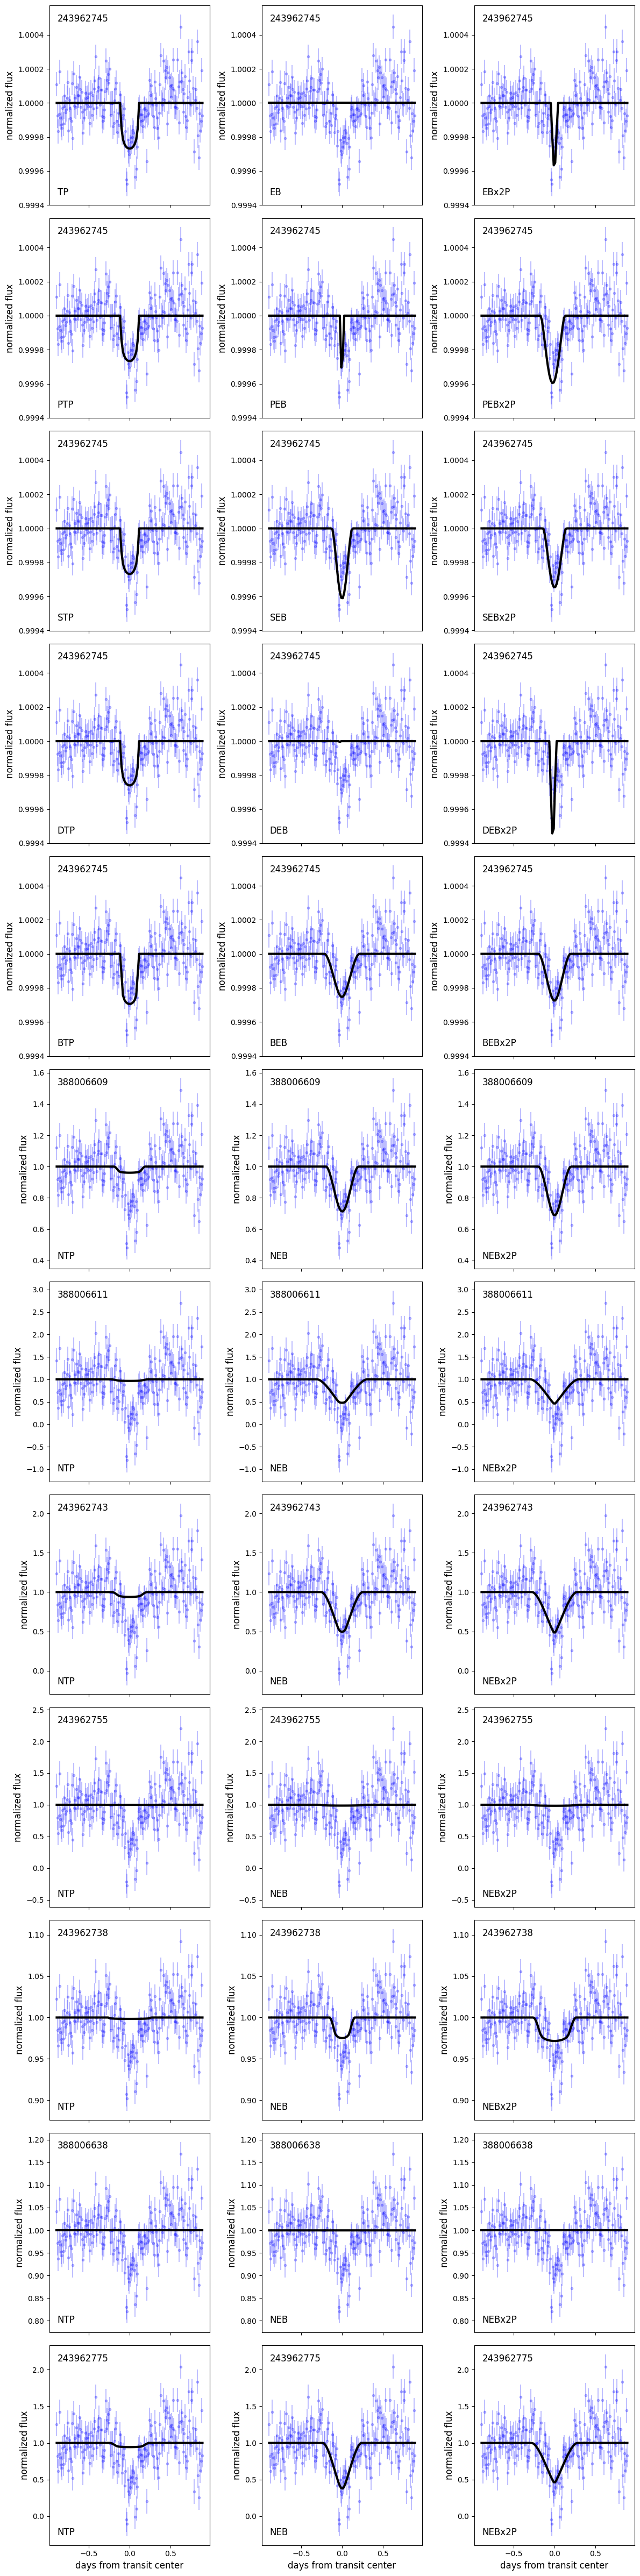

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time
# Repetations reduced
FPPs = np.zeros(15)
NFPPs = np.zeros(15)
for i in range(15):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.0737184014085114 +/- 0.014231550817762874
NFPP = 0.017437208255920423 +/- 0.0018009561551259245
CPU times: user 2h 4min 1s, sys: 1min 53s, total: 2h 5min 55s
Wall time: 1h 21min 48s


Our final conclusion about this specified planet of TIC 243962745 is that it likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).